# Assignment 5 
> Dominik Huffield <br>
CS 533 <br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics

### Load and Prepare Data

In [2]:
articles = pd.DataFrame.from_records(
    ((f.parent.name, f.name, f.read_text(encoding='latin1'))
     for f in Path('bbc').glob('*/*.txt')),
    columns=['category', 'file', 'text']
)

In [3]:
articles.groupby('category')['file'].count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: file, dtype: int64

**The distribution of each categorty represented numerically**

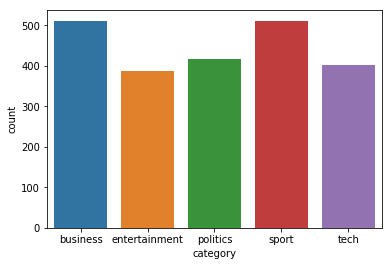

In [4]:
sns.countplot(x=articles['category'])

**The distribution of each categorty represented graphically**

In [5]:
category_dict = {'business':0, 'entertainment':1, 'politics':2, 'sport':3, 'tech':4}
articles['category_id'] = articles['category'].map(category_dict) 

Coverts categories to numeric and creates a dictionary to refernce terms later

In [6]:
X = articles['text']
y = articles['category_id']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Splitting into train and test sets having 20% sample test size

In [8]:
count_vect = CountVectorizer(stop_words='english')
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

Document term matrix for CountVectorizer as a dataframe

In [9]:
tfidf_vect = TfidfVectorizer(stop_words='english')
X_train_tfi = tfidf_vect.fit_transform(X_train)
X_test_tfi = tfidf_vect.transform(X_test)

pd.DataFrame(X_train_tfi.toarray(), columns=tfidf_vect.get_feature_names()).head()

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zoom,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.024116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.068102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Document term matrix for TfidfVectorizer as a dataframe

### Part 2: Classification

>Taining a model using Naive Bayes using Count Vectorization as data

In [10]:
nb_mod = MultinomialNB()
%time nb_mod.fit(X_train_count, y_train)

CPU times: user 11.6 ms, sys: 4.35 ms, total: 15.9 ms
Wall time: 12.8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
y_pred_nb = nb_mod.predict(X_train_count)
metrics.accuracy_score(y_train, y_pred_nb)

0.9921348314606742

Accuracy score of NB for predicting dependent variable in training set

In [12]:
y_pred_nb = nb_mod.predict(X_test_count)
metrics.accuracy_score(y_test, y_pred_nb)

0.9865168539325843

Accuracy score of NB for predicting dependent variable in testing set

>Taining a model using KNeighborsClassifier using TfidfVectorization as data

In [13]:
kn_mod = KNeighborsClassifier(n_neighbors=5)
%time kn_mod.fit(X_train_tfi, y_train)

CPU times: user 16 ms, sys: 1.36 ms, total: 17.3 ms
Wall time: 3.42 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_pred_kn = kn_mod.predict(X_train_tfi)
metrics.accuracy_score(y_train, y_pred_kn)

0.9567415730337079

Accuracy score of Kneighbors for predicting dependent variable in training set

In [15]:
y_pred_kn = kn_mod.predict(X_test_tfi)
metrics.accuracy_score(y_test, y_pred_kn)

0.9438202247191011

Accuracy score of Kneighbors for predicting dependent variable in testing set

### Part 3: Clustering

<br>

>Building Kmeans model with 5 clusters

**1. Fit Kmean using TF-IDF**

In [16]:
kmeans = KMeans(n_clusters=5, random_state=2)
%time kmeans.fit(X_train_tfi, y_train)

CPU times: user 2min 54s, sys: 1.08 s, total: 2min 55s
Wall time: 1min 10s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [17]:
y_pred_kmn = kmeans.predict(X_train_tfi)
metrics.accuracy_score(y_train, y_pred_kmn)

0.15786516853932583

Accuracy score of Kmeans for predicting dependent variable in training set

In [18]:
y_pred_kmn = kmeans.predict(X_test_tfi)
metrics.accuracy_score(y_test, y_pred_kmn)

0.1707865168539326

Accuracy score of Kmeans for predicting dependent variable in training set

In [19]:
ivd = {v: k for k, v in category_dict.items()}
kmn_df = pd.DataFrame(y_pred_kmn, columns=['pred_label'], index=y_test.index)

kmn_df['label'] = y_test

kmn_df['pred_label'].replace(ivd, inplace=True)
kmn_df['label'].replace(ivd, inplace=True)

kmn_df.head()

,pred_label,label
2132,tech,tech
1507,business,sport
2060,tech,tech
1077,sport,politics
1611,business,sport


Creates a data frame to compare predicted classes vs actual classes

**2. For each cluster, show the distibution of document categories**

In [20]:
km_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=tfidf_vect.get_feature_names()).rename(index=ivd)
# km2_centroids.sort(axis=1, inplace=True)
km_centroids.sum(axis=1)

business          8.697706
entertainment    10.162026
politics          9.183793
sport             8.850502
tech              9.810166
dtype: float64

/Users/dom/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


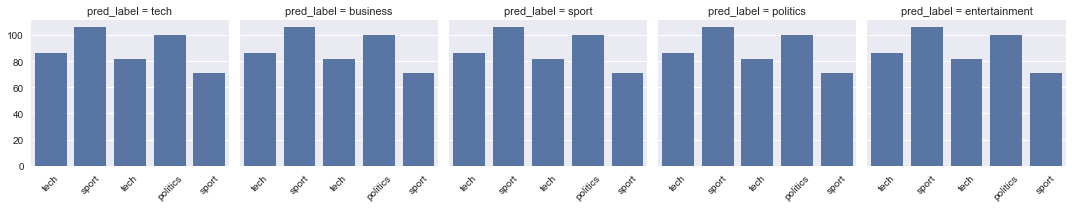

In [21]:
plt.style.use('seaborn')
g = sns.FacetGrid(kmn_df, col="pred_label", sharey=True)

axs =  g.map(sns.countplot,x=kmn_df['label'])
axs.set_xticklabels(kmn_df['label'], rotation=45)

plt.tight_layout()


**3. Did the clustering do a good job of finding the categories?** <br>
<br>


In [22]:
(kmn_df['label'] == kmn_df['pred_label']).mean()

0.1707865168539326

No the clusters poorly depict categories, random guessing should get an accuracy about .2 and we are below that <br>
<br>
**4. Try again with 6 clusters**

>Now for a model using 6 clusters 

In [23]:
kmeans2 = KMeans(n_clusters=6, random_state=2)
%time kmeans2.fit(X_train_tfi, y_train)

CPU times: user 3min 4s, sys: 1.36 s, total: 3min 5s
Wall time: 1min 18s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [24]:
y2_pred_kmn = kmeans2.predict(X_test_tfi)
metrics.accuracy_score(y_test, y2_pred_kmn)

0.06741573033707865

In [25]:
km2_centroids = pd.DataFrame(kmeans2.cluster_centers_, columns=tfidf_vect.get_feature_names()).rename(index=ivd)
# km2_centroids.sort(axis=1, inplace=True)
km2_centroids.sum(axis=1)

business          9.828442
entertainment     8.688832
politics          8.708513
sport             9.337533
tech             10.114293
5                 9.331580
dtype: float64

I dont believe that 6 clusters is as effective because there is an extra cluster that has no label and is wastful <br><br>
**5. What words are most important amoungst the clusters using the kmeans model you find best fit** 

In [26]:
df = pd.DataFrame(X_train_tfi.toarray(), columns=tfidf_vect.get_feature_names(), index=y_train.index)
df2 = pd.DataFrame(X_test_tfi.toarray(), columns=tfidf_vect.get_feature_names(), index=y_test.index)

df = df.append(df2)
df.sort_index(inplace=True)

df['label'] = articles['category']
# df['label'].replace(ivd, inplace=True)

df = pd.DataFrame(df.groupby('label').sum())

for c in df.index:
    x = df.loc[c]
    m = df.drop(index=[c]).sum()
    x = pd.Series(x-m, name=c)
    print(x.nlargest(5))
    print('\n')


growth     12.643265
bank       11.886028
oil        11.657608
economy    11.140770
shares     10.335491
Name: business, dtype: float64


film        25.232904
band         9.181770
awards       8.908231
festival     8.610274
album        8.504034
Name: entertainment, dtype: float64


labour      23.757338
blair       19.935790
election    19.284202
party       17.238335
brown       11.259431
Name: politics, dtype: float64


cup        12.184536
england    11.557264
match      10.757881
injury     10.298159
chelsea    10.039704
Name: sport, dtype: float64


mobile        12.571600
software      12.012661
users         11.894253
technology    10.594204
microsoft      9.959274
Name: tech, dtype: float64




The top 5 tokens for each category where the value of the frequency of a token in one category minus sum of frequency of that same token in other category is maximized. This gives the most important features for our classifier.

In [27]:
df.loc['tech'].nlargest()

people        16.106320
said          15.066588
mobile        14.903934
technology    12.642451
software      12.366015
Name: tech, dtype: float64

The five largest valued tokens to identify something as tech related. This provides decent results but can be improved <br><br>

In [28]:
df.loc['tech'].subtract(df.drop(index=['tech']).sum()).nlargest()

mobile        12.571600
software      12.012661
users         11.894253
technology    10.594204
microsoft      9.959274
dtype: float64

By taking the scores of each word within a given label and subrtacting the combined score of that word under the other labels we will obtain words uniquely correlated to the label at hand. For example the words in our first set compared to the words in the second youll notice 'people' and 'said' were replaced with 'users' and 'microsoft'. This correlation filter allows for better feature selection. 